In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Building a Traffic Sign Recognition Classifier, Deep Learning Approach 

### Overview  

In this project, I train a CNN model to classify traffic sign images using the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset). Below I discuss about the general steps of the pipeline:  

- Loading the provided raw data, **training**, **validation**, and **test** data sets. 
- exploring the raw data, by checking the size for each category, visualizing, and pre-processing the raw-data to improve model performance in general.  
- Modifying/Processing the raw images and storing the processed ones in associated pickle files, so that they can be reloaded for next trial runs, as needed.  
- Defining the CNN model and finetuning the hyper-parameters to get the best performance, a trade-off between accuracy and speed is also important.  
- Test and visualize the performance on the **test** data set.  
- Visualize itermediate layers' outputs.  

> **Note**: `Cnn` wrapper class is created alongside this jupyter notebook for better code review and readability. The concept is similar to that os `Keras` library, but of course supporting a lot more limited functionalities, just to cover the requirements of this project.  

### Laoding and exploring the provided raw data  

- **Whitenning Images**:  
    While exploring the raw data, I noticed several images that were dark, not really highlighting the features very well. To improve on it, I developed function `Cnn.whiten_images_self_mean` that takes an image as an input and slightly enlighten - or whiten - it with respect to its own average RGB component values. That can of course be performed on HLS space, increasing the light component; However, this approach worked well for now. Below you can see some examples of the images before and after whitening.  

Before Whitenning             |  After Whitenning
:-------------------------:|:-------------------------:
![Before](Images/sample-01-d.png)  |  ![After](Images/sample-01.png)  
 | 
![Before](Images/sample-02-d.png)  |  ![After](Images/sample-02.png)  
 |
![Before](Images/sample-03-d.png)  |  ![After](Images/sample-03.png)  

***
> **Note**:
There are couple of other appraoches proposed in some literatures for image whitenning that I tried them, but they did not work as expected for me. One of them, that I already tried, is called **Zero Components Analysis** or **ZCA** for short. I think this a great method but it requires more careful considerations for the training dataset. For example, after exploring some of the images whitenned using ZCA, the results were so deviated from the original image that I could not identify what the original image was. But it is still worth exploring and I would work on it in a future work attempt.  
- [LINK-1: Preprocessing for deep learning: from covariance matrix to image whitening](https://hadrienj.github.io/posts/Preprocessing-for-deep-learning/)
- [LINK-2: Preprocessing for deep learning: from covariance matrix to image whitening](https://www.freecodecamp.org/news/preprocessing-for-deep-learning-from-covariance-matrix-to-image-whitening-9e2b9c75165c/)  

  In addition, there are also some general useful guidelines that I followed for data pre-processing, such as the guidelines suggested in the link below:  
- [Image Pre-processing for Deep Learning](https://towardsdatascience.com/image-pre-processing-c1aec0be3edf) 

  

- **Data Augmentation**:  
    Why is it required? After examining the provided raw data, I observed that it may not provide enough data for some categories,; in other word, the training dataset does not provide fair number of samples for each category. For example, some features have significantly more data than ohers. Here is the distribution of number of images of each category:  
    
    `features_counts: [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920 690  540  360  990 1080  180  300  270  330 450  240 1350  540  210 480  240  390  690  210  599  360 1080  330  180 1860  270  300  210 210]`
    
    So it is needed to augment the data in a logical way. My simple approach is to generate some fake images of each category by applying slight noises. Function `Cnn.augment_data` is created to perform this job. After data augmentation, equal sample size of each category is selected form the post-processed and augmented data and the results are saved into the `traffic-signs-data` directory for future uses. 
    
    > **Note**: This task needs to be run only once, therefore for future runs, the post-processed data will be loaded for training, validation, and test steps. 
    
    After training-data augmentation process, each category will have enough number of data as follows. 
    
    `features_counts: [1440, 3240, 3270, 2520, 3030, 2910, 1620, 2550, 2520, 2580, 3060, 2430, 3150, 3180, 1950, 1800, 1620, 2250, 2340, 1440, 1560, 1530, 1590, 1710, 1500, 2610, 1800, 1470, 1740, 1500, 1650, 1950, 1470, 1859, 1620, 2340, 1590, 1440, 3120, 1530, 1560, 1470, 1470]`  
        
    However, the training data is loaded such that each category has equal sample size as follows:  
    
    `features_counts: [1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440]`  
    
### Defining the CNN model:  

The model arcitecture consists of five CNN layers followed two fully-connected - FC - layers. The parameters of the CNN model is selected and tuned such that it becomes smallet as it goes deeper, i.e. more feature depths but smaller layers. The output of each CNN layer is fed into a batch-normalizer to ensure that the results - trained weights and biases - do not overshoot, causing numerical instability and poor training performance.  

For the FC layers, dropout appraoch is used to prevent overfitting. 

### Results and Discussions  

- **Before Data Augmentation**:  
    After going through 100 iterations on the training data batches - `epochs = 100` - the validatoin accuracy of close to `89%` is achieved - using smaller network. Tracking the training-loss suggets that the model overfit the training data, as the test loss - using the training data - keep decreasing while validation accuracy almost saturates - see the training log below.  
    
    
`Training... start`  
`Epoch 10: Test Cost: 0.1957 --- Valid Accuracy: 0.8329`  
`Epoch 20: Test Cost: 0.0632 --- Valid Accuracy: 0.8719`  
`Epoch 30: Test Cost: 0.0262 --- Valid Accuracy: 0.8878`  
`Epoch 40: Test Cost: 0.0135 --- Valid Accuracy: 0.8961`  
`Epoch 50: Test Cost: 0.0165 --- Valid Accuracy: 0.8855`  
`Epoch 60: Test Cost: 0.0038 --- Valid Accuracy: 0.8882`  
`Epoch 70: Test Cost: 0.0050 --- Valid Accuracy: 0.8966`  
`Epoch 80: Test Cost: 0.0021 --- Valid Accuracy: 0.8868`  
`Epoch 90: Test Cost: 0.0024 --- Valid Accuracy: 0.8791`  
`Epoch 100: Test Cost: 0.0013 --- Valid Accuracy: 0.8871`  
`Training... end`  

- **After Data Augmentation**:  
    After going through 50 iterations on the training data batches - `epochs = 50` - the validatoin accuracy of close to `97%` is achieved. Tracking the training-loss suggets that the model performance is resonable and it did not overfit the training data. This is later confirmed by using the **test** data set that is not exposed to the model at all. The overall test accuracy is observed to be `95%`. 

### Potential Improvement Areas  

I can think of couple of improvement areas that I would like to explore. 

-  **Utilizing more training data**:  
   In general, by adding more clear and clean data of each category, the performance should be improved. Currently, the data augmentation is done by applying some level of noise. However, by adding more cear publicly-available data - that are clean and clear - one may improve the performance.  
   
-  By examining the wrong predictions, it is observed that some of them are actually from the first 9 categories that are related to speed limit signs. Therefore, One way is to train a CNN model solely for the first 9 categories and the other one for all 43 categories - or just the other 34 categories. The final score will be decided after passing the test images into both CNNs. One benefit is that one may use smaller CNN size to get better speed and accuracy performance.  



In [2]:
# Load pickled data
import pickle

import pandas as pd
import cv2
import numpy as np
from sklearn import preprocessing
import os
from random import shuffle
import glob
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
import math

from keras.layers import Input, InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import keras
from keras import backend as K

Using TensorFlow backend.


In [3]:
training_raw_file = "traffic-signs-data/train.p"
validation_raw_file = "traffic-signs-data/valid.p"
testing_raw_file = "traffic-signs-data/test.p"

training_processed_file = "traffic-signs-data/train-processed.p"
validation_processed_file = "traffic-signs-data/valid-processed.p"
testing_processed_file = "traffic-signs-data/test-processed.p"

csv_features_file = "signnames.csv"

### Data explorations and processing    

- loading the alread-provided raw data 
- data augmentation  
- image whitenning 
- storing the processed data - augmented and whitenned 

> **Note**: This cell needs to be run only once - although it can be run several times, but not really needed. In the following cells below, the generated data file will be loaded and used for training purposes. 

In [3]:
from importlib import reload
import classificationModules
reload(classificationModules)
from classificationModules import Cnn

# in case resizing is required - not used in this pipeline
target_image_size = 32
epsilon = 0.0

with open(training_raw_file, mode="rb") as f:
    train_raw_data = pickle.load(f)
with open(validation_raw_file, mode="rb") as f:
    valid_raw_data = pickle.load(f)
with open(testing_raw_file, mode="rb") as f:
    test_raw_data = pickle.load(f)

# pre-processing the raw data 

x_train_raw_data, y_train_raw_data = train_raw_data["features"], train_raw_data["labels"]
x_valid_raw_data, y_valid_raw_data = valid_raw_data["features"], valid_raw_data["labels"]
x_test_raw_data, y_test_raw_data = test_raw_data["features"], test_raw_data["labels"]

x_train_norm_data = Cnn.normalize(x_train_raw_data, approach="scale")
x_valid_norm_data = Cnn.normalize(x_valid_raw_data, approach="scale")
x_test_norm_data = Cnn.normalize(x_test_raw_data, approach="scale")

y_train_norm_data = y_train_raw_data

x_train_norm_data, y_train_norm_data, features_counts = Cnn.augment_data(x_train_norm_data, y_train_norm_data, epsilon=0.05)
x_train_norm_data, y_train_norm_data, features_counts = Cnn.augment_data(x_train_norm_data, y_train_norm_data, epsilon=-0.05)
x_train_norm_data, y_train_norm_data, features_counts = Cnn.augment_data(x_train_norm_data, y_train_norm_data, epsilon=0.05)

# Note: ZCA approach is not used for now 
# Cnn.whiten_images_zca(x_train_norm_data, train_processed_data["features"], batch_size=1000, epsilon=0.1)
# Cnn.whiten_images_zca(x_valid_norm_data, valid_processed_data["features"], batch_size=1000, epsilon=0.1)
# Cnn.whiten_images_zca(x_test_norm_data, test_processed_data["features"], batch_size=1000, epsilon=0.1)

# np.zeros_like(x_train_norm_data).astype(np.uint8)
train_processed_data = {"features":None, "labels":y_train_norm_data}
valid_processed_data = {"features":None, "labels":y_valid_raw_data}
test_processed_data = {"features":None, "labels":y_test_raw_data}

train_processed_data["features"] = Cnn.whiten_images_self_mean(x_train_norm_data, batch_size=1000, width_offset=1, height_offset=1, 
                                                               epsilon=0.0, verbose=True)
valid_processed_data["features"] = Cnn.whiten_images_self_mean(x_valid_norm_data, batch_size=1000, width_offset=1, height_offset=1, 
                                                               epsilon=0.0, verbose=True)
test_processed_data["features"] = Cnn.whiten_images_self_mean(x_test_norm_data, batch_size=1000, width_offset=1, height_offset=1, 
                                                              epsilon=0.0, verbose=True)
# Note: useful for debugging only 
# train_processed_data = np.copy(train_raw_data)
# valid_processed_data = np.copy(valid_raw_data)
# test_processed_data = np.copy(test_raw_data)

with open(training_processed_file, mode="wb") as f:
    pickle.dump(train_processed_data, f)
with open(validation_processed_file, mode="wb") as f:
    pickle.dump(valid_processed_data, f)
with open(testing_processed_file, mode="wb") as f:
    pickle.dump(test_processed_data, f)

# releasing memory 

# train_raw_data = None
valid_raw_data = None
test_raw_data = None

# train_processed_data = None
valid_processed_data = None
test_processed_data = None


features count before augmentation: [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]
features count after augmentation: [360, 2160, 2190, 1440, 1950, 1830, 540, 1470, 1440, 1500, 1980, 1350, 2070, 2100, 870, 720, 540, 1170, 1260, 360, 480, 450, 510, 630, 420, 1530, 720, 390, 660, 420, 570, 870, 390, 779, 540, 1260, 510, 360, 2040, 450, 480, 390, 390]
features count before augmentation: [ 360 2160 2190 1440 1950 1830  540 1470 1440 1500 1980 1350 2070 2100
  870  720  540 1170 1260  360  480  450  510  630  420 1530  720  390
  660  420  570  870  390  779  540 1260  510  360 2040  450  480  390
  390]
features count after augmentation: [720, 2520, 2550, 1800, 2310, 2190, 900, 1830, 1800, 1860, 2340, 1710, 2430, 2460, 1230, 1080, 900, 1530, 1620, 720, 840, 810, 870, 990, 780, 1890, 1080, 750, 1020, 780, 930, 1230, 750,

### Exploring some of the post-processed images  


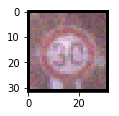

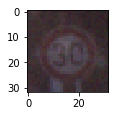

In [183]:
temp_images = train_processed_data["features"]
temp_labels = train_processed_data["labels"]

test_image_index = 2100

plt.figure(figsize=(1.5, 1.5))
plt.imshow(temp_images[test_image_index])

# =============================================================

temp_images = x_train_norm_data
temp_labels = y_train_norm_data

plt.figure(figsize=(1.5, 1.5))
plt.imshow(temp_images[test_image_index])


### Loading data sets from the post-processed pickle files 
- In this cell, already-preprocessed data files are loaded for training, validation, and test purposes.  


In [5]:
with open(training_processed_file, mode="rb") as f:
    train_data = pickle.load(f)
with open(validation_processed_file, mode="rb") as f:
    valid_data = pickle.load(f)
with open(testing_processed_file, mode="rb") as f:
    test_data = pickle.load(f)

"""
with open(training_raw_file, mode="rb") as f:
    train_data = pickle.load(f)
with open(validation_raw_file, mode="rb") as f:
    valid_data = pickle.load(f)
with open(testing_raw_file, mode="rb") as f:
    test_data = pickle.load(f)
"""


'\nwith open(training_raw_file, mode="rb") as f:\n    train_data = pickle.load(f)\nwith open(validation_raw_file, mode="rb") as f:\n    valid_data = pickle.load(f)\nwith open(testing_raw_file, mode="rb") as f:\n    test_data = pickle.load(f)\n'

### Preparing training, validation, and test data sets  

In [6]:
from importlib import reload
import classificationModules
reload(classificationModules)
from classificationModules import Cnn


In [7]:
x_train_raw_data, y_train_raw_data = train_data["features"], train_data["labels"]
x_valid_raw_data, y_valid_raw_data = valid_data["features"], valid_data["labels"]
x_test_raw_data, y_test_raw_data = test_data["features"], test_data["labels"]

# in case resizing is required - not used in this pipeline
target_image_size = 32
    
features_df = pd.read_csv(csv_features_file)
unique_label_ids = [row["ClassId"] for _, row in features_df.iterrows()]
unique_label_names = [row["SignName"] for _, row in features_df.iterrows()]

n_train = x_train_raw_data.shape[0]
n_validation = x_valid_raw_data.shape[0]
n_test = x_test_raw_data.shape[0]

# shape of an traffic sign image
image_shape = x_train_raw_data.shape[1:4]

# unique classes/labels there are in the dataset
assert np.array_equal(np.sort(np.unique(y_train_raw_data)), np.sort(np.asarray(unique_label_ids))), \
    "There is a mismatch in the training data"

n_classes = len(unique_label_ids)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# n_classes = len(cnn.label_ids)

features_counts = [(np.where(train_data["labels"] == label_id))[0].size for label_id in unique_label_ids]
print("\nFeatures count of training set\n:", features_counts)
print("\nFeatures count of validation set\n:", [(np.where(valid_data["labels"] == label_id))[0].size for label_id in unique_label_ids])
print("\nFeatures count of test set\n:", [(np.where(test_data["labels"] == label_id))[0].size for label_id in unique_label_ids])

# =================================================================================================

x_train_raw_data, y_train_raw_data, new_features_counts = \
    Cnn.select_equally_sized_data_sets(x_train_raw_data, y_train_raw_data, n_classes=n_classes, 
                                       unique_label_ids=unique_label_ids, features_counts=features_counts)

print("\nFeatures counts after equal size selection:\n", new_features_counts)

Number of training examples = 88979
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43

Features count of training set
: [1440, 3240, 3270, 2520, 3030, 2910, 1620, 2550, 2520, 2580, 3060, 2430, 3150, 3180, 1950, 1800, 1620, 2250, 2340, 1440, 1560, 1530, 1590, 1710, 1500, 2610, 1800, 1470, 1740, 1500, 1650, 1950, 1470, 1859, 1620, 2340, 1590, 1440, 3120, 1530, 1560, 1470, 1470]

Features count of validation set
: [30, 240, 240, 150, 210, 210, 60, 150, 150, 150, 210, 150, 210, 240, 90, 90, 60, 120, 120, 30, 60, 60, 60, 60, 30, 150, 60, 30, 60, 30, 60, 90, 30, 90, 60, 120, 60, 30, 210, 30, 60, 30, 30]

Features count of test set
: [60, 720, 750, 450, 660, 630, 150, 450, 450, 480, 660, 420, 690, 720, 270, 210, 150, 360, 390, 60, 90, 90, 120, 150, 90, 480, 180, 60, 150, 90, 150, 270, 60, 210, 120, 390, 120, 60, 690, 90, 90, 60, 90]

Features counts after equal size selection:
 [1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440

### Pre-processing loaded data  
- Normalization of loaded data between 0 and 1 
- One-hot encoding of the loaded labels 

In [8]:
import random

from importlib import reload
import classificationModules
reload(classificationModules)
from classificationModules import Cnn

cnn = Cnn()
cnn.init_model(unique_label_names, unique_label_ids)

x_train_data, y_train_data = Cnn.normalize(x_train_raw_data, approach="scale"), cnn.one_hot_encode(y_train_raw_data)
x_valid_data, y_valid_data = Cnn.normalize(x_valid_raw_data, approach="scale"), cnn.one_hot_encode(y_valid_raw_data)
x_test_data, y_test_data = Cnn.normalize(x_test_raw_data, approach="scale"), cnn.one_hot_encode(y_test_raw_data)


### Shuffle the traning data

In [9]:
labelled_data = list(zip(x_train_data, y_train_data))
random.shuffle(labelled_data)
random_x_train_data, random_y_train_data = zip(*labelled_data)

random_x_train_data = list(random_x_train_data)
random_y_train_data = list(random_y_train_data)


### Exploring and visualizing the shuffled training data  

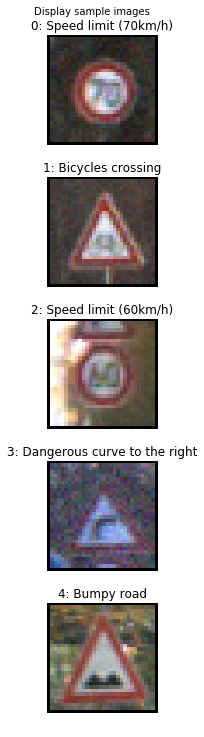

In [9]:
%matplotlib inline

cnn.display_images(random_x_train_data[0:5], random_y_train_data[0:5], normalized=True)

### CNN Model Architecture

In [10]:
def create_conv_net(x, keep_prob, n_classes):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data - normalized image 
    : keep_prob: Placeholder tensor that hold dropout keep probability 
    : return: Tensor that represents logits
    """
    # Applying a few Convolution and Max Pool layers
    
    conv_ksize = (8, 8)  # filter dimensions
    # conv_ksize = (3, 3)  # filter dimensions
    conv_strides = (1, 1)
    pool_ksize = (2, 2)  # Filter kernel/patch dimensions [batch, height, width, channels]
    pool_strides = (1, 1)
    
    # batch_normalizer = tf.keras.layers.BatchNormalization(trainable=False)
    # x = batch_normalizer(x)
    
    # batch_normalizer = None
    
    #conv_layer = conv2d_maxpool(x, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv_num_outputs = 16  # D_out : number of out filters
    batch_normalizer = tf.keras.layers.BatchNormalization(trainable=True)
    conv_layer = cnn.conv2d_maxpool(x, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, 
                                    wieghts_name="weights-layer-1", layer_name="hidden-layer-1", batch_normalizer=batch_normalizer)
    #conv_layer = normalize_batch(conv_layer)
    
    # next layer
    conv_ksize = (5, 5)  # output layers dimensions
    conv_num_outputs = 32
    batch_normalizer = tf.keras.layers.BatchNormalization(trainable=True)
    conv_layer = cnn.conv2d_maxpool(conv_layer, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, 
                                    wieghts_name="weights-layer-2", layer_name="hidden-layer-2", batch_normalizer=batch_normalizer)
    
    # next layer
    conv_ksize = (5, 5)  # output layers dimensions
    conv_num_outputs = 32
    batch_normalizer = tf.keras.layers.BatchNormalization(trainable=True)
    conv_layer = cnn.conv2d_maxpool(conv_layer, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, 
                                    wieghts_name="weights-layer-3", layer_name="hidden-layer-3", batch_normalizer=batch_normalizer)
    
    # next layer
    conv_ksize = (5, 5)  # output layers dimensions
    conv_num_outputs = 64
    batch_normalizer = tf.keras.layers.BatchNormalization(trainable=True)
    conv_layer = cnn.conv2d_maxpool(conv_layer, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, 
                                    wieghts_name="weights-layer-4", layer_name="hidden-layer-4", batch_normalizer=batch_normalizer)
    
    # next layer
    conv_ksize = (5, 5)  # output layers dimensions
    conv_num_outputs = 64
    batch_normalizer = tf.keras.layers.BatchNormalization(trainable=True)
    conv_layer = cnn.conv2d_maxpool(conv_layer, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, 
                                    wieghts_name="weights-layer-5", layer_name="hidden-layer-5", batch_normalizer=batch_normalizer)
    
    # next layer
    conv_ksize = (2, 2)  # output layers dimensions
    conv_num_outputs = 128
    batch_normalizer = tf.keras.layers.BatchNormalization(trainable=True)
    conv_layer = cnn.conv2d_maxpool(conv_layer, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, 
                                    wieghts_name="weights-layer-6", layer_name="hidden-layer-6", batch_normalizer=batch_normalizer)
    
    ################################################
    # flattenning the layer
    x_tensor = cnn.flatten(conv_layer)

    # Applying a few fully connected layers
    
    # x_tensor = tf.layers.batch_normalization(x_tensor)
    x_tensor = cnn.fully_conn(x_tensor, 128)
    # normalize_batch = tf.keras.layers.BatchNormalization(trainable=True)
    # x_tensor = normalize_batch(x_tensor)
    x_tensor = tf.nn.dropout(x_tensor, keep_prob)
    
    x_tensor = cnn.fully_conn(x_tensor, 64)
    # normalize_batch = tf.keras.layers.BatchNormalization(trainable=True)
    # x_tensor = normalize_batch(x_tensor)
    x_tensor = tf.nn.dropout(x_tensor, keep_prob)

    # Applying an Output Layer
    output_tensor = cnn.output(x_tensor, n_classes)
    
    return output_tensor


##############################
## Build the Neural Network ##
##############################

learning_rate = 1e-4

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = cnn.neural_net_image_input((target_image_size, target_image_size, 3))
y = cnn.neural_net_label_input(n_classes)
keep_prob = cnn.neural_net_keep_prob_input()

# Model
logits = create_conv_net(x, keep_prob, n_classes)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name="logits")

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name="accuracy")

# tests.test_conv_net(conv_net)

conv2d_maxpool... Start
Checking inputs dimensions...
conv_ksize: (8, 8)
conv_num_outputs: 16
Instructions for updating:
Colocations handled automatically by placer.
Checking strides dimensions...
conv_strides: (1, 1, 1, 1)
pool_ksize: (1, 2, 2, 1)
pool_strides (1, 1, 1, 1)
batch_normalizer: <tensorflow.python.keras.layers.normalization.BatchNormalizationV1 object at 0x000001AFCDB64588>
conv_layer: (?, 24, 24, 16)
conv2d_maxpool... End

conv2d_maxpool... Start
Checking inputs dimensions...
conv_ksize: (5, 5)
conv_num_outputs: 32
Checking strides dimensions...
conv_strides: (1, 1, 1, 1)
pool_ksize: (1, 2, 2, 1)
pool_strides (1, 1, 1, 1)
batch_normalizer: <tensorflow.python.keras.layers.normalization.BatchNormalizationV1 object at 0x000001AFD1978BE0>
conv_layer: (?, 19, 19, 32)
conv2d_maxpool... End

conv2d_maxpool... Start
Checking inputs dimensions...
conv_ksize: (5, 5)
conv_num_outputs: 32
Checking strides dimensions...
conv_strides: (1, 1, 1, 1)
pool_ksize: (1, 2, 2, 1)
pool_strides 

### Setting up hyper parameters and training on batches

In [11]:
epochs = 50
batch_size = 512
keep_probability = 0.80
save_model_path = "saved-model-01/"

In [12]:
print("Training... start")

test_costs = []
valid_accuracies = []

with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        
        batch_index = 0
        
        # for batch_features, batch_labels in CommonModules.load_preprocess_training_batch(batch_i, batch_size):
        for batch_features, batch_labels in cnn.batch_features_labels(random_x_train_data, random_y_train_data, batch_size):
            
            print("batch_index", batch_index, end="\r")
            batch_index += 1
            
            cnn.train_neural_network(sess, x, y, keep_prob, optimizer, keep_probability, batch_features, batch_labels)
            
        test_cost, valid_accuracy = cnn.print_stats(sess, x, y, keep_prob, batch_features, batch_labels, 
                                                    x_valid_data, y_valid_data, cost, accuracy, "Epoch {0:>2}: ".format(epoch + 1))
        
        test_costs.append(test_cost)
        valid_accuracies.append(valid_accuracy)
        
        if((epoch + 1) % 1 == 0):
            print("")
    
    # Save the Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

print("Training... end")

Training... start
Epoch  1: Test Cost: 2.3160   ---   Valid Accuracy: 0.3753
Epoch  2: Test Cost: 1.0150   ---   Valid Accuracy: 0.7288
Epoch  3: Test Cost: 0.5770   ---   Valid Accuracy: 0.8231
Epoch  4: Test Cost: 0.3781   ---   Valid Accuracy: 0.8535
Epoch  5: Test Cost: 0.2781   ---   Valid Accuracy: 0.8782
Epoch  6: Test Cost: 0.2048   ---   Valid Accuracy: 0.8909
Epoch  7: Test Cost: 0.1707   ---   Valid Accuracy: 0.8918
Epoch  8: Test Cost: 0.1275   ---   Valid Accuracy: 0.9168
Epoch  9: Test Cost: 0.1049   ---   Valid Accuracy: 0.9224
Epoch 10: Test Cost: 0.0936   ---   Valid Accuracy: 0.9295
Epoch 11: Test Cost: 0.0761   ---   Valid Accuracy: 0.9354
Epoch 12: Test Cost: 0.0639   ---   Valid Accuracy: 0.9433
Epoch 13: Test Cost: 0.0634   ---   Valid Accuracy: 0.9376
Epoch 14: Test Cost: 0.0548   ---   Valid Accuracy: 0.9458
Epoch 15: Test Cost: 0.0446   ---   Valid Accuracy: 0.9497
Epoch 16: Test Cost: 0.0411   ---   Valid Accuracy: 0.9460
Epoch 17: Test Cost: 0.0378   ---   Va

### Testing the performance 

- Measuring the model performance by plotting ROC - AUC curve  
- Visualizing the first top-five scored predictions of 10 samples, picked from test dataset  

In [12]:
fpr = {}
tpr = {}
auc = {}

In [19]:
import random

from importlib import reload
import classificationModules
reload(classificationModules)
from classificationModules import Cnn

INFO:tensorflow:Restoring parameters from saved-model-01/
Testing Accuracy: 0.952



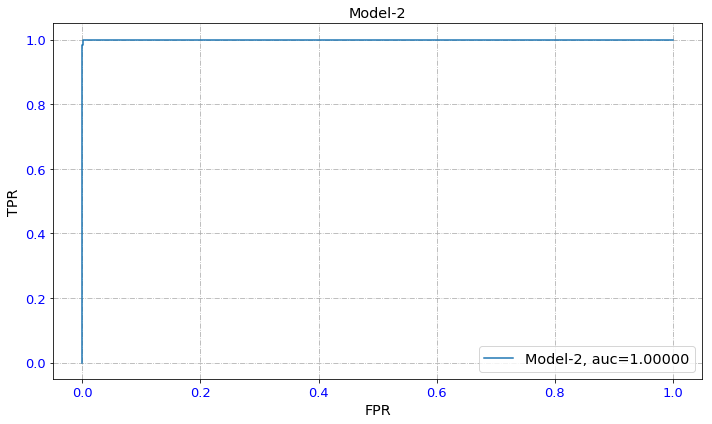

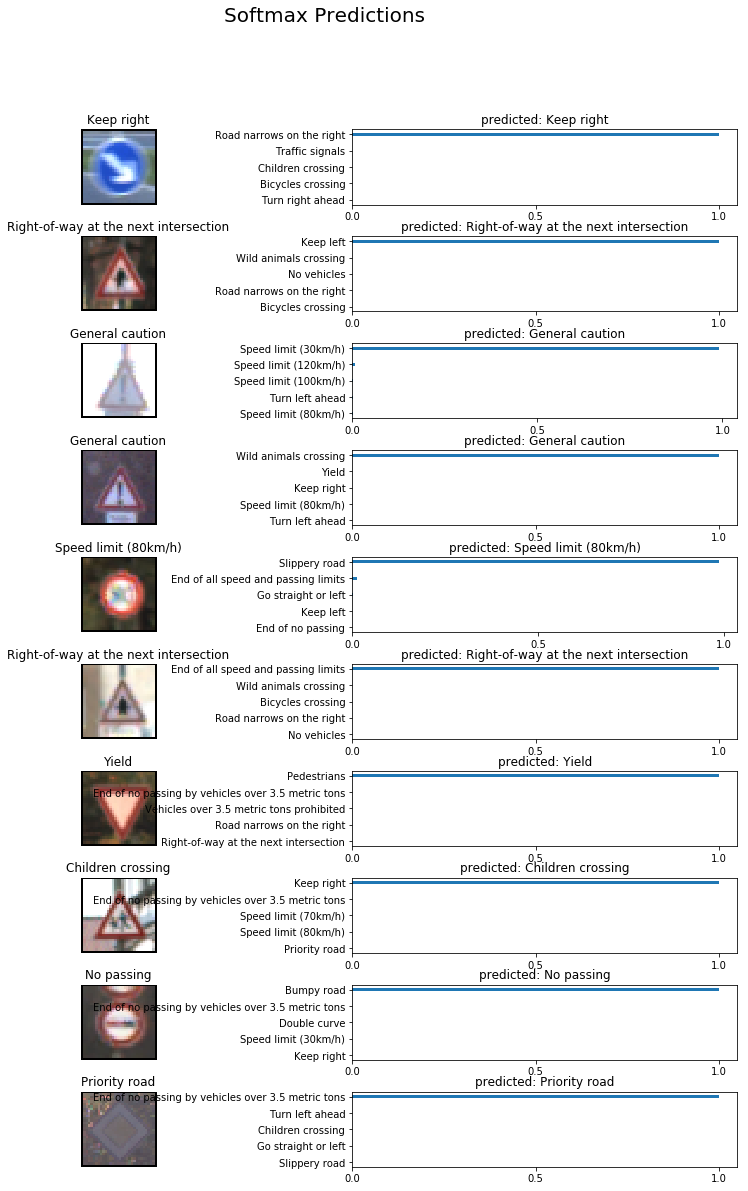

In [20]:
top_n_predictions = 5

def test_model(test_features, test_labels, n_classes, n_samples):
    """
    Test the saved model against the test dataset
    """

    # test_images, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()
    # loaded_graph = tf.get_default_graph()

    with tf.Session(graph=loaded_graph) as sess:
    # with tf.Session() as sess:
        # sess.run(tf.global_variables_initializer())
        
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + ".meta")
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name("x:0")
        loaded_y = loaded_graph.get_tensor_by_name("y:0")
        loaded_keep_prob = loaded_graph.get_tensor_by_name("keep_prob:0")
        loaded_logits = loaded_graph.get_tensor_by_name("logits:0")
        loaded_acc = loaded_graph.get_tensor_by_name("accuracy:0")
        
        # sess.run(tf.global_variables_initializer())
        
        # loaded_y = tf.expand_dims(loaded_y, 1)
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in cnn.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            
            test_batch_count += 1
            
        print("Testing Accuracy: {0:0.3f}\n".format(test_batch_acc_total/test_batch_count))

        # ROC
        #all_test_predictions = sess.run(tf.nn.top_k(tf.nn.softmax(loaded_logits), label_categories_count), 
        #                                            feed_dict={loaded_x: test_features, loaded_y: test_labels, loaded_keep_prob: 1.0})
        
        all_test_predictions = sess.run(tf.nn.softmax(loaded_logits), 
                                        feed_dict={loaded_x: test_features, loaded_y: test_labels, loaded_keep_prob: 1.0})

        predicted_y_probabilities = (all_test_predictions / all_test_predictions.sum(axis=0, keepdims=1))[::, 0]

        #print("all_test_predictions", all_test_predictions[:10])
        #print("y_pred_proba", y_pred_proba[:10])

        #y_pred = all_test_predictions[1][::, 0]
        #y_pred_proba = (all_test_predictions[0] / all_test_predictions[0].sum(axis=0, keepdims=1))[::, 0]
        
        # print("y_pred_proba", y_pred_proba)
        
        fpr["model-a"], tpr["model-a"], auc["model-a"] = Cnn.plot_roc_curve(test_labels[::, 0], predicted_y_probabilities, 
                                                                            title="Model-2", legend_title="Model-2, auc")
        
        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        
        # random_test_predictions = sess.run(tf.nn.softmax(loaded_logits),
        #                                   feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        
        #random_test_predictions = sess.run(tf.nn.top_k(random_test_predictions, label_categories_count))

        random_test_predictions = sess.run(tf.nn.top_k(tf.nn.softmax(loaded_logits), n_classes), 
                                                       feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, 
                                                                  loaded_keep_prob: 1.0})
        
        # print("random_test_predictions", random_test_predictions.values[0])
        # print("random_test_labels", np.asanyarray(random_test_labels).shape)
        # print("random_test_labels", cnn.lb.inverse_transform(np.asanyarray(random_test_labels)))
        
        # random_test_predictions = sess.run(
        #  tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
        #  feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        cnn.display_image_predictions(random_test_features, random_test_labels, random_test_predictions, max_top_count=top_n_predictions)
        
    return (random_test_features, random_test_labels, random_test_predictions)
        
tested_features, tested_labels, tested_predictions = test_model(x_test_data, y_test_data, n_classes, n_samples=10)

---

### Visualize the Neural Network's State with Test Images  


INFO:tensorflow:Restoring parameters from saved-model-01/
 -------------------- Layer-2 ---------------------


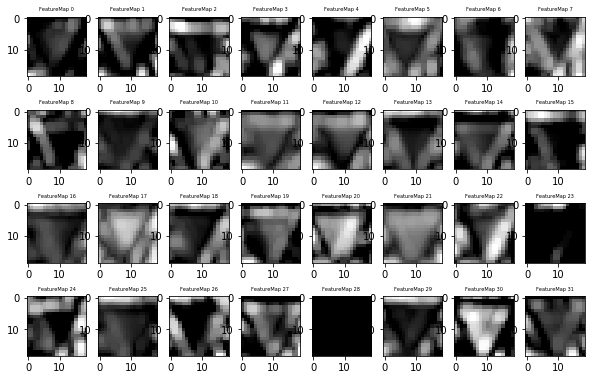

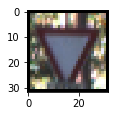

In [49]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

"""
Test the saved model against the test dataset
"""

# test_images, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
loaded_graph = tf.Graph()
# loaded_graph = tf.get_default_graph()

with tf.Session(graph=loaded_graph) as sess:
    # with tf.Session() as sess:
    # sess.run(tf.global_variables_initializer())

    # Load model
    loader = tf.train.import_meta_graph(save_model_path + ".meta")
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    loaded_x = loaded_graph.get_tensor_by_name("x:0")
    loaded_y = loaded_graph.get_tensor_by_name("y:0")
    loaded_keep_prob = loaded_graph.get_tensor_by_name("keep_prob:0")
    loaded_logits = loaded_graph.get_tensor_by_name("logits:0")
    loaded_acc = loaded_graph.get_tensor_by_name("accuracy:0")

    # loaded_graph.

    conv_layer_1 = loaded_graph.get_tensor_by_name("hidden-layer-1:0")
    conv_layer_2 = loaded_graph.get_tensor_by_name("hidden-layer-2:0")
    conv_layer_3 = loaded_graph.get_tensor_by_name("hidden-layer-3:0")
    conv_layer_4 = loaded_graph.get_tensor_by_name("hidden-layer-4:0")
    conv_layer_5 = loaded_graph.get_tensor_by_name("hidden-layer-5:0")

    # "weights-layer-1"
    # "hidden-layer-1"

    stimuli = x_test_data[26]
    tf_image_input = np.reshape(stimuli, [-1, stimuli.shape[0], stimuli.shape[1], stimuli.shape[2]])
    
    print(" -------------------- Layer-2 ---------------------")
    Cnn.output_feature_map(tf_image_input, loaded_x, conv_layer_2, sess, activation_min=-1, activation_max=-1, plt_num=1)

    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(stimuli)

